## Imports

In [1]:
import sys
sys.path.append('../Scripts')

In [2]:
import text_preprocessing_v2 as tp2
import pandas as pd, numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qk_le\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Paths

In [3]:
data_training_en_path = '../Datasets/PAN19-Author-Profiling-20200229/CSV/pan19-author-profiling-training-2019-02-18-en.csv'
data_training_es_path = '../Datasets/PAN19-Author-Profiling-20200229/CSV/pan19-author-profiling-training-2019-02-18-es.csv'
data_test_en_path = '../Datasets/PAN19-Author-Profiling-20200229/CSV/pan19-author-profiling-test-2019-04-29-en.csv'
data_test_es_path = '../Datasets/PAN19-Author-Profiling-20200229/CSV/pan19-author-profiling-test-2019-04-29-es.csv'

## Data

In [4]:
data_training_en = pd.read_csv(data_training_en_path)
data_test_en = pd.read_csv(data_test_en_path)

In [5]:
data_training_es = pd.read_csv(data_training_es_path)
data_test_es = pd.read_csv(data_test_es_path)

## Preprocessing

In [6]:
prep_en = tp2.Preprocessing(language='english')
prep_es = tp2.Preprocessing(language='spanish')

### English

In [7]:
data_training_en = prep_en.main_preprocess(data=data_training_en, 
                                column='tweet', 
                                remove_stop_words=False, 
                                is_dataframe=True, 
                                emoji_path=None)

In [8]:
data_training_en.head()

,Unnamed: 0,id,tweet,author,gender
0,0,1008c35dc72c34ead679c539a0ed7c24,i can hear the black bull jukey calling,human,male
1,1,1008c35dc72c34ead679c539a0ed7c24,tony robinson or the agincourt salute,human,male
2,2,1008c35dc72c34ead679c539a0ed7c24,insight into how challenging touring is for a ...,human,male
3,3,1008c35dc72c34ead679c539a0ed7c24,flight of the rat https t co ras krs c classic...,human,male
4,4,1008c35dc72c34ead679c539a0ed7c24,he switched his twitter aff give him a poke on...,human,male


In [9]:
data_test_en = prep_en.main_preprocess(data=data_test_en, 
                                column='tweet', 
                                remove_stop_words=False, 
                                is_dataframe=True, 
                                emoji_path=None)

In [10]:
data_test_en.head()

,Unnamed: 0,id,tweet,author,gender
0,0,1004f4afed2845ffc0079096de16d6f2,no one can make you feel inferior without your...,bot,bot
1,1,1004f4afed2845ffc0079096de16d6f2,read the life and music of rupert holmes http ...,bot,bot
2,2,1004f4afed2845ffc0079096de16d6f2,check out far out and super cool watches http ...,bot,bot
3,3,1004f4afed2845ffc0079096de16d6f2,tornado automatic cocktail shaker very cool ht...,bot,bot
4,4,1004f4afed2845ffc0079096de16d6f2,spinal tap rocked my world its for rock what t...,bot,bot


In [11]:
data_training_en = data_training_en.dropna(how='all')
data_test_en = data_test_en.dropna(how='all')

### Spanish

In [12]:
data_training_es = prep_es.main_preprocess(data=data_training_es, 
                                column='tweet', 
                                remove_stop_words=False, 
                                is_dataframe=True, 
                                emoji_path=None)

In [13]:
data_training_es.head()

,Unnamed: 0,id,tweet,author,gender
0,0,101b7e91c65fffeb87282ca0308af455,rt laazcarate hoy me salen todas las canciones,human,female
1,1,101b7e91c65fffeb87282ca0308af455,rt valdedrama un tipo me gusta y estoy en esa ...,human,female
2,2,101b7e91c65fffeb87282ca0308af455,rt valdedrama como hablo cuando el que me gust...,human,female
3,3,101b7e91c65fffeb87282ca0308af455,rt biondaimmorale yo creo que la gente tambien...,human,female
4,4,101b7e91c65fffeb87282ca0308af455,rt bleu minette no me esperaba eso de vos te d...,human,female


In [14]:
data_test_es = prep_es.main_preprocess(data=data_test_es, 
                                column='tweet', 
                                remove_stop_words=False, 
                                is_dataframe=True, 
                                emoji_path=None)

In [15]:
data_test_es.head()

,Unnamed: 0,id,tweet,author,gender
0,0,10081456099ce9fc370e3f1e7db9c27b,rt cumbre cp la comunicacion del gobierno es u...,human,male
1,1,10081456099ce9fc370e3f1e7db9c27b,ahora daniela aruj empieza su exposicion brill...,human,male
2,2,10081456099ce9fc370e3f1e7db9c27b,gracias por compartir https t co qmax imuwd t,human,male
3,3,10081456099ce9fc370e3f1e7db9c27b,gracias por todo el apoyo a la presentacion y ...,human,male
4,4,10081456099ce9fc370e3f1e7db9c27b,gracias jpvmx por compartir https t co qmax im...,human,male


In [12]:
data_training_es = data_training_es.dropna(how='all')
data_test_es = data_test_es.dropna(how='all')

## Data visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [14]:
bar_colors = ['tab:red', 'tab:blue']

In [15]:
def plot_counts(labels, counted_labels, bar_colors, x_label, y_label, plot_title, plot_size):
    fig = plt.figure(figsize=plot_size)
    
    plt.bar(labels, counted_labels, color=bar_colors)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)

    plt.figure(figsize=plot_size)
    plt.show()

### English

In [16]:
data_training_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17550 entries, 0 to 17549
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17550 non-null  int64 
 1   id          17550 non-null  object
 2   tweet       17550 non-null  object
 3   author      17550 non-null  object
 4   gender      17550 non-null  object
dtypes: int64(1), object(4)
memory usage: 685.7+ KB


In [17]:
values_author_en = data_training_en.author.value_counts()
values_gender_en = data_training_en.gender.value_counts()

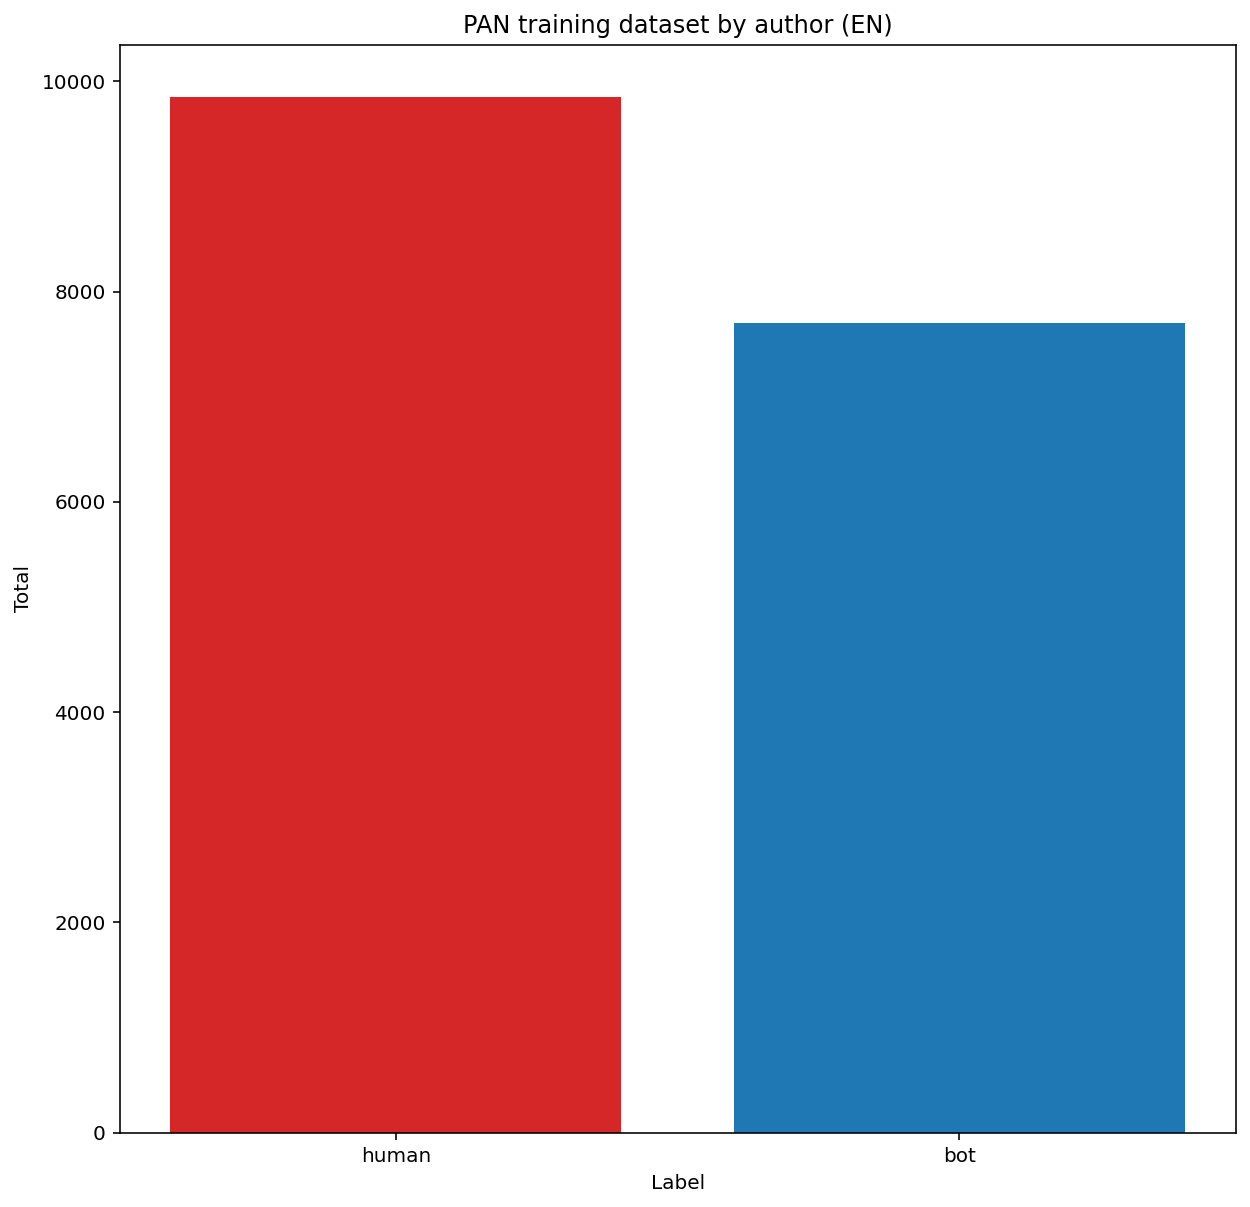

<Figure size 720x720 with 0 Axes>

In [18]:
plot_counts(labels=values_author_en.keys().tolist(), 
            counted_labels=values_author_en.values.tolist(),
            bar_colors=bar_colors,
            x_label='Label',
            y_label='Total',
            plot_title='PAN training dataset by author (EN)',
            plot_size=(10,10))

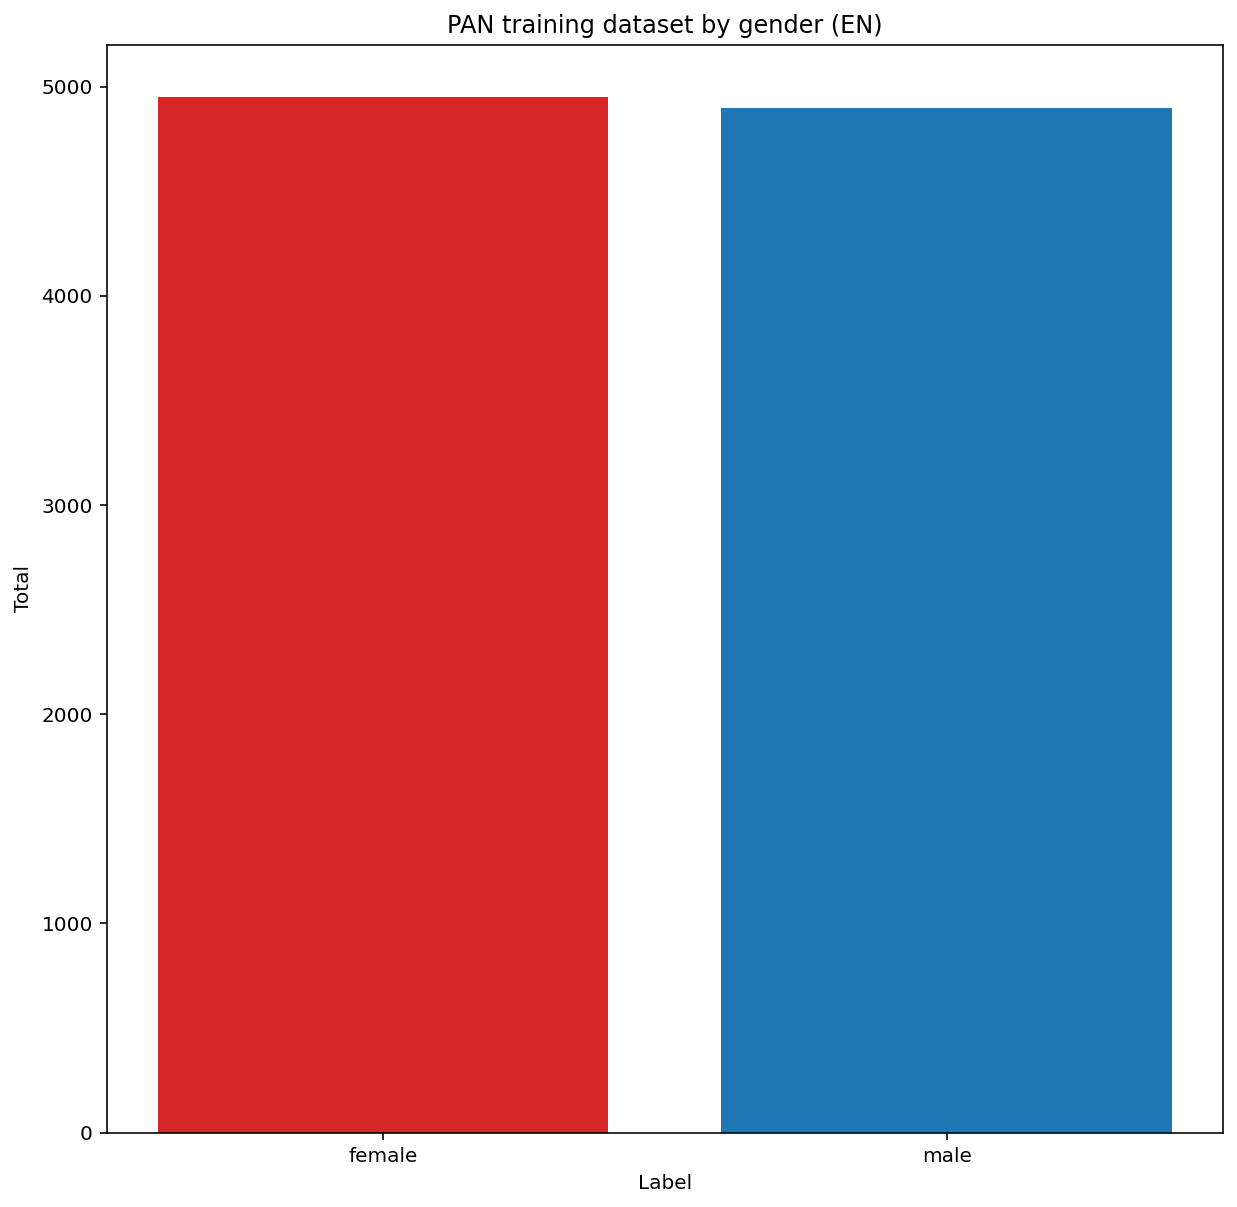

<Figure size 720x720 with 0 Axes>

In [19]:
plot_counts(labels=values_gender_en.keys().tolist()[1:], 
            counted_labels=values_gender_en.values.tolist()[1:],
            bar_colors=bar_colors,
            x_label='Label',
            y_label='Total',
            plot_title='PAN training dataset by gender (EN)',
            plot_size=(10,10))

### Spanish

In [20]:
data_training_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105736 entries, 0 to 105735
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  105736 non-null  int64 
 1   id          105736 non-null  object
 2   tweet       105736 non-null  object
 3   author      105736 non-null  object
 4   gender      105736 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.0+ MB


In [21]:
values_author_es = data_training_es.author.value_counts()
values_gender_es = data_training_en.gender.value_counts()

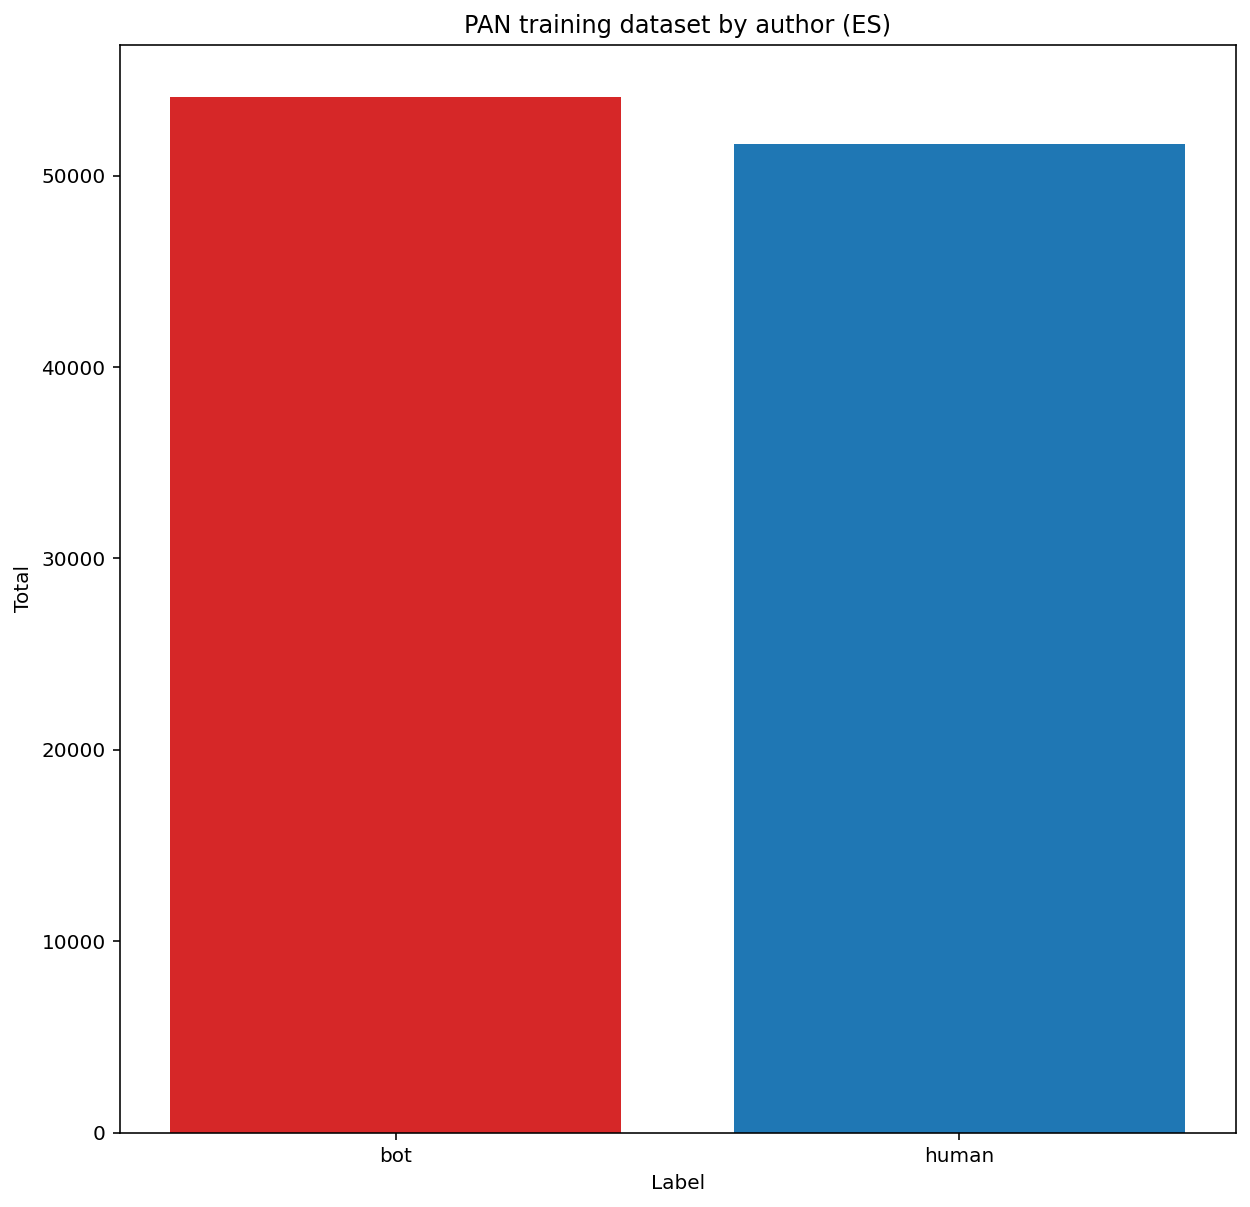

<Figure size 720x720 with 0 Axes>

In [22]:
plot_counts(labels=values_author_es.keys().tolist(), 
            counted_labels=values_author_es.values.tolist(),
            bar_colors=bar_colors,
            x_label='Label',
            y_label='Total',
            plot_title='PAN training dataset by author (ES)',
            plot_size=(10,10))

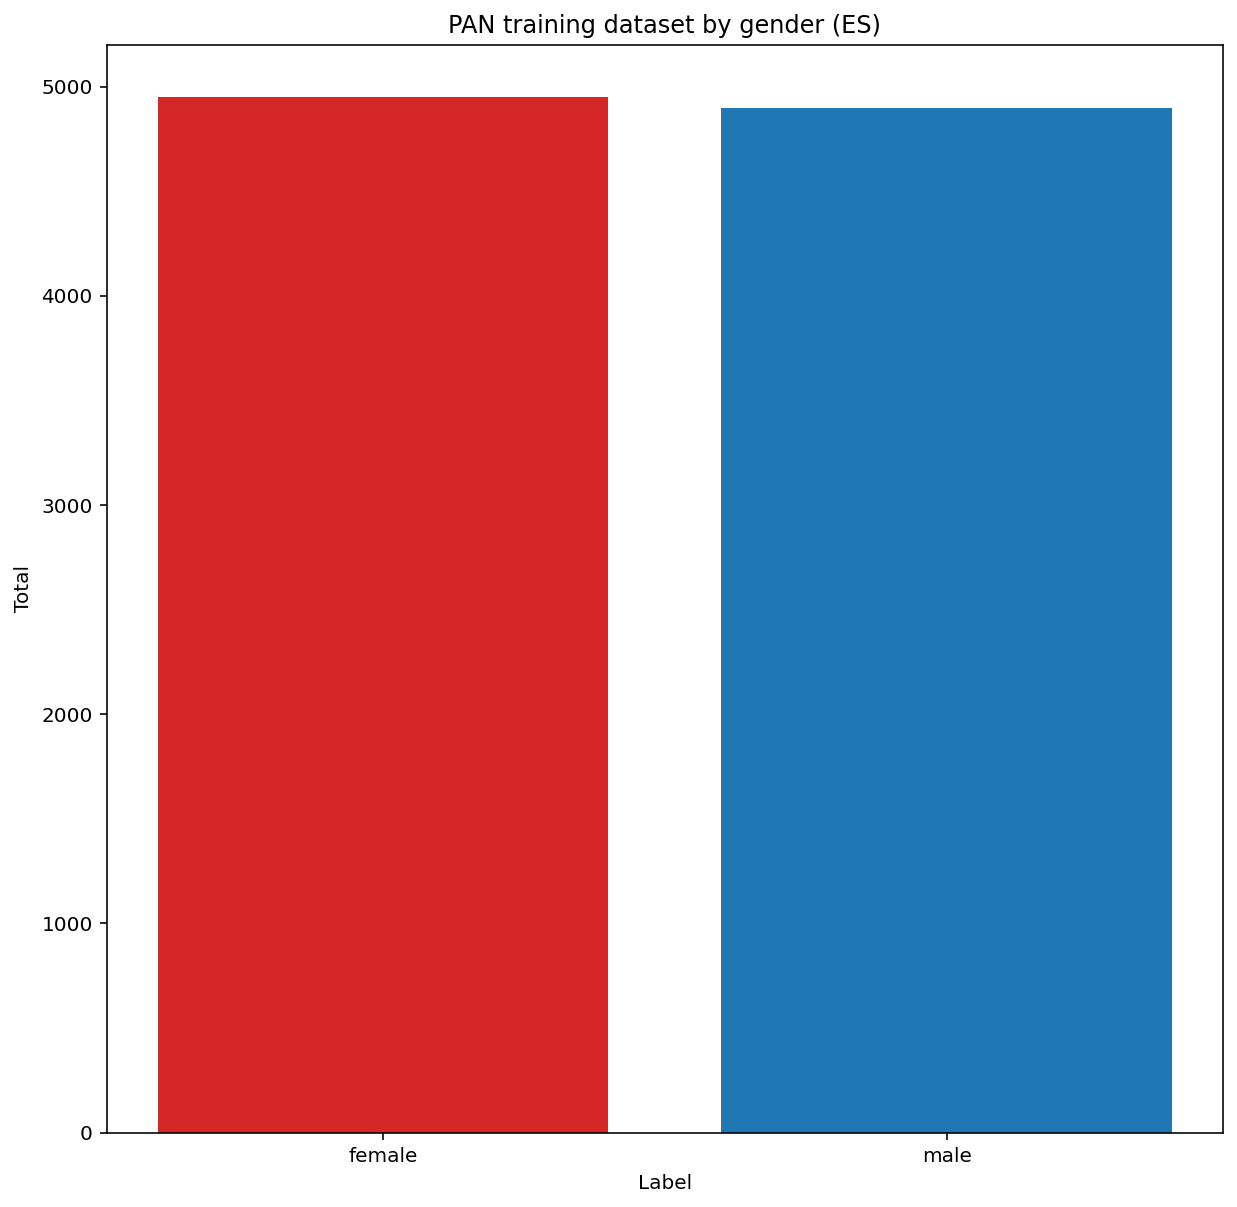

<Figure size 720x720 with 0 Axes>

In [23]:
plot_counts(labels=values_gender_es.keys().tolist()[1:], 
            counted_labels=values_gender_es.values.tolist()[1:],
            bar_colors=bar_colors,
            x_label='Label',
            y_label='Total',
            plot_title='PAN training dataset by gender (ES)',
            plot_size=(10,10))

## Baseline

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
import time

In [40]:
def change_labels(data, column, original_labels, numeric_labels):
    for i, label in enumerate(original_labels):
        data = data[column].replace([label], numeric_labels[i])
    return data

In [41]:
data_training_en = change_labels(data_training_en, 
                                 'author',
                                 values_author_en.keys().tolist(),
                                 [0,1])
data_training_en.head()

KeyError: 'author'

In [27]:
def baseline(model, cv, train_data, test_data, scoring, x_label_column, y_label_column):
    # Training data
    x_train = train_data[x_label_column].tolist()
    y_train = train_data[y_label_column].tolist()

    # Test data
    x_test = test_data[x_label_column].tolist()
    y_test = test_data[y_label_column].tolist()

    # Vectorizing text data
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3)
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)

    # K-Fold 
    print('5 k-fold')
    %%time
    cv_results = cross_val_score(model, x_train, y_train, cv=cv, scoring=scoring)
    print(cv_results.mean())

    # Fitting model
    print('Fitting model')
    %%time
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Results
    print(metrics.classification_report(y_test, y_pred, target_names=[]))


    return model, vectorizer


In [28]:
seed = 42
scoring = scoring = {'Accuracy': 'accuracy', 'F1-Score': 'f1', 
                'Precision': 'precision', 'Recall': 'recall'}
model = LogisticRegression(random_state = seed, penalty = 'l2', 
                            solver = 'liblinear', max_iter = 1000)
cv = KFold(n_splits=5, shuffle=True, random_state=seed)

In [29]:
model, vectorizer = baseline(model, cv, data_training_en, 'tweet', 'author')

In [31]:
model.score(vectorizer.transform(data_test_en['tweet'].tolist()), data_test_en['author'].tolist())

ValueError: X has 11893 features, but LogisticRegression is expecting 30150 features as input.